<a href="https://colab.research.google.com/github/koojahyeok/pytorch_study/blob/main/Supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [2]:
# 2차원 벡터
n_dim = 2

# make_blobs () 함수가 만들어내는 레이블 데이터는 각 데이터 한 점, 한 점이 몇 번째 클러스터에 속해 있는지 알려주는 인덱스로,
# 본 예제에서는 총 4개의 클러스터(0, 1, 2, 3)을 만들어 각 데이터는 모두 라벨링 되어 있다.

# 학습을 위한 데이터셋 (80개)
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)

print(x_train)
print(len(x_train))
print('============')
print(y_train)

# 평가를 위한 데이터셋 (20개)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)

[[ 1.55039539  0.8061335 ]
 [-0.85341345 -0.68366339]
 [ 0.8391078   1.43444766]
 [ 0.72029972 -1.35723451]
 [-1.81413866  1.344213  ]
 [-1.08767409  1.10945951]
 [ 1.34626261 -0.82187394]
 [-1.47397837 -1.05340808]
 [-0.99019138  1.0601727 ]
 [-0.95049802 -0.74126946]
 [ 1.61442768 -0.92913257]
 [ 1.17771459  0.76121155]
 [-0.64585872 -1.52620137]
 [ 0.54690584 -1.33422128]
 [-1.35191583 -1.32540288]
 [-1.61127758 -1.38200831]
 [ 0.92238205  1.18089706]
 [ 0.63004025  1.26307091]
 [ 0.35551199 -0.56592339]
 [ 1.07220555 -1.53657741]
 [-1.12232347 -1.011521  ]
 [ 1.32970515  0.32437411]
 [-0.54749532  0.67489513]
 [ 0.53956002  1.14225571]
 [-1.28623405  0.96253423]
 [ 0.56022923  0.94473031]
 [ 0.94223565 -1.20412493]
 [-1.02505846 -1.19761767]
 [-0.98726069 -0.37476962]
 [-0.63107473  0.53619129]
 [ 0.94977236  1.09964965]
 [-0.96288392 -0.97809527]
 [ 0.8466154   1.20349666]
 [ 1.38812193 -1.1725102 ]
 [-1.10529712 -0.83448686]
 [-0.72618375 -1.36726384]
 [ 0.70773504 -1.21314477]
 

In [3]:
# 상단에 구현한 4개의 라벨을 2개의 라벨로 합쳐서 간단하게 0, 1로만 구분할 수 있도록 추가적인 함수를 구현
# 0 or 1일 경우엔 0 / 2 or 3일 경우엔 1로 맵핑
def label_map(y_, from_, to_):
    y = np.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

y_train = label_map(y_train, [0, 1], 0)
y_train = label_map(y_train, [2, 3], 1)
y_test = label_map(y_test, [0, 1], 0)
y_test = label_map(y_test, [2, 3], 1)


print(x_train)
print(len(x_train))
print('============')
print(y_train)

[[ 1.55039539  0.8061335 ]
 [-0.85341345 -0.68366339]
 [ 0.8391078   1.43444766]
 [ 0.72029972 -1.35723451]
 [-1.81413866  1.344213  ]
 [-1.08767409  1.10945951]
 [ 1.34626261 -0.82187394]
 [-1.47397837 -1.05340808]
 [-0.99019138  1.0601727 ]
 [-0.95049802 -0.74126946]
 [ 1.61442768 -0.92913257]
 [ 1.17771459  0.76121155]
 [-0.64585872 -1.52620137]
 [ 0.54690584 -1.33422128]
 [-1.35191583 -1.32540288]
 [-1.61127758 -1.38200831]
 [ 0.92238205  1.18089706]
 [ 0.63004025  1.26307091]
 [ 0.35551199 -0.56592339]
 [ 1.07220555 -1.53657741]
 [-1.12232347 -1.011521  ]
 [ 1.32970515  0.32437411]
 [-0.54749532  0.67489513]
 [ 0.53956002  1.14225571]
 [-1.28623405  0.96253423]
 [ 0.56022923  0.94473031]
 [ 0.94223565 -1.20412493]
 [-1.02505846 -1.19761767]
 [-0.98726069 -0.37476962]
 [-0.63107473  0.53619129]
 [ 0.94977236  1.09964965]
 [-0.96288392 -0.97809527]
 [ 0.8466154   1.20349666]
 [ 1.38812193 -1.1725102 ]
 [-1.10529712 -0.83448686]
 [-0.72618375 -1.36726384]
 [ 0.70773504 -1.21314477]
 

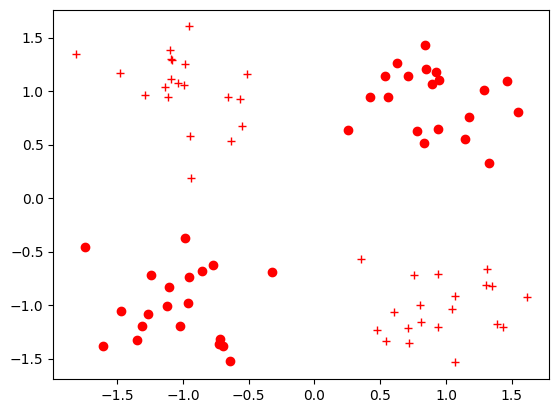

In [4]:
def vis_data(x, y = None, c = 'r'):
    if y is None:
        y = [None] * len(X)
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*',markerfacecolor='none', markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ ==0 else c+'+')

plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

In [5]:
x_train = torch.FloatTensor(x_train)
print(x_train.shape)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

torch.Size([80, 2])


In [6]:
#신경망 구축
class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()       #NeuralNet 클래스가 nn.module의 속성을 갖고 초기화된다
        self.input_size = input_size            #입력데이터 차원
        self.hidden_size = hidden_size          #linear layer 내 은닉 유닛 개수
        self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)  #torch.nn.Linear는 bias와 행렬곱을 포함한 연산을 지원할 수 있는 Linear Layer반환
        self.relu = torch.nn.ReLU()     #activation function ReLU 선언
        self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()   #activation function Sigmoid 선언

    def forward(self, input_tensor):        #네트워크 거칠 때 사용되는 함수
        #linear 1 : [input_size, hidden_size] 크기의 가중치(weight)를 행렬곱 하고, bias를 터해 [1, hidden_size꼴의 텐서를 반환]
        linear1 = self.linear_1(input_tensor)

        #ReLU 함수 적용 -> 입력 값이 0보다 작으면 0, 그이상이면 그대로 출력
        relu = self.relu(linear1)

        #ReLU 거친 후 linear_2를 거치면서 [1,1 ]사이즈로 반환
        linear2 = self.linear_2(relu)

        #sigmoid 함수를 거쳐서 0~1 사이를 반환
        #최종적으로 이 데이터가 0 or 1 중 어느쪽에 더 가까운지 판별
        output = self.sigmoid(linear2)
        return output


In [7]:
#학습에 필수적인 변수, 알고리즘 정의

#input size를 2, hidden_size를 5로 설정한 객체 선언
model = NeuralNet(2, 5)

learning_rate = 0.03
#Binary Cross Entropy loss함수를 Loss function으로 적용
criterion = torch.nn.BCELoss()

#전체 학습 데이터를 총 몇번 모델에 입력할지 결정
epochs = 2000

#Optimizer를 SGD로 설정
#Step()함수를 부를 때마다 가중치를 학습률만큼 갱신
#model.parameter()함수로 추출한 모델 내의 weight, lerning rate 입력
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [8]:
model.eval()    #아무런 학습을 진행하지 않았을 때의 성능 테스트

#x_test(모델의 결과갑)와 y_test(실제 레이블 값) 간의 차원을 동일하게 하기 위해서 squeeze()함수 사용
test_loss_before = criterion(model(x_test).squeeze(), y_test)

print('Before Training, test loss is {}'.format(test_loss_before.item()))       #스칼라 형태로 출력하기 위해 .item

Before Training, test loss is 0.7007168531417847


In [9]:
for epoch in range(epochs): #epochs만큼 도는 함수
    model.train()

    optimizer.zero_grad()   #epoch마다 새로운 gradient 계산을 위해 gradient를 0으로 설정

    train_output = model(x_train)       #실제 학습 데이터를 입력하여 결과값 계산, 이 때 실행되는 함수는 NeuralNet에서 정의한 foward함수
                                        #nn.module이 알아서 foward계산

    train_loss = criterion(train_output.squeeze(), y_train)

    if epoch % 100 == 0:                #100 epoch마다 학습이 잘 되가는지 체크하는 함수
        print('train loss at {} is {}'.format(epoch, train_loss.item()))

    train_loss.backward()           #오차함수를 gradient로 미분해서 오차가 최소가 되는 행렬 구함
    optimizer.step()               #그 방향으로 모델을 학습률 만큼 이동 => backpropagation

train loss at 0 is 0.6976303458213806
train loss at 100 is 0.6337346434593201
train loss at 200 is 0.5856256484985352
train loss at 300 is 0.5400202870368958
train loss at 400 is 0.4974837303161621
train loss at 500 is 0.4577556252479553
train loss at 600 is 0.4201769232749939
train loss at 700 is 0.38467103242874146
train loss at 800 is 0.3515738844871521
train loss at 900 is 0.32172054052352905
train loss at 1000 is 0.29532894492149353
train loss at 1100 is 0.2718915343284607
train loss at 1200 is 0.2510256767272949
train loss at 1300 is 0.2325328141450882
train loss at 1400 is 0.21621179580688477
train loss at 1500 is 0.20187485218048096
train loss at 1600 is 0.1892791986465454
train loss at 1700 is 0.17821472883224487
train loss at 1800 is 0.1684945672750473
train loss at 1900 is 0.160055011510849


In [10]:
#학습결과 테스트
model.eval()
test_loss = criterion(torch.squeeze(model(x_test)), y_test)
print('After training, test loss is {}'.format(test_loss.item()))

After training, test loss is 0.11611980199813843


In [11]:
torch.save(model.state_dict(), './model.pt')    #이형태로 학습된 모델 저장하여 사용 가능
print('state_dict format of the model: {}'.format(model.state_dict()))
#state_dict는 모델 내 가중치를 dictionary 형태로 가중치 텐서와 편향 텐서를 저장한 데이터

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[ 1.5443, -1.6185],
        [ 0.9311, -0.9749],
        [ 0.4322,  0.1397],
        [ 1.3762, -1.4406],
        [ 1.1602, -1.2260]])), ('linear_1.bias', tensor([-0.3544, -0.2097, -0.7859, -0.3093,  2.0164])), ('linear_2.weight', tensor([[ 2.0939,  1.3765,  0.2169,  1.9548, -2.4366]])), ('linear_2.bias', tensor([1.5122]))])


In [12]:
new_model = NeuralNet(2,5)
new_model.load_state_dict(torch.load('./model.pt'))
new_model.eval()
print('벡터 [-1, 1]이 레이블 1을 가질 확률은 {}'.format(new_model(torch.FloatTensor([-1, 1])).item()))

벡터 [-1, 1]이 레이블 1을 가질 확률은 0.8193830847740173
